## Shortest paths visualization

In [1]:
from graphviz import Digraph

In [2]:
def init_graph_from_str(s):
    splitted = [int(x) for x in s.split()]
    edges = [ splitted[i : i + 3]  for i in range(1, len(splitted), 3)]
    return {'n': splitted[0], 'edges': edges}

In [3]:
def get_dijkstra_iterations(vertices_cnt, s):
    splitted = [int(x) for x in s.split()]
    x = [ 
            { 'cur_v': splitted[i], 'd': splitted[i + 1 : i + vertices_cnt + 1] } 
            for i in range(0, len(splitted), vertices_cnt + 1) 
        ]
    return x        

In [4]:
def get_fb_iterations(s):
    splitted = [int(x) for x in s.split()]
    x = list()
    pos = 0
    while (True):
        cur = []
        cnt = splitted[pos]
        for i in range(pos + 1, pos + 1 + 2*cnt, 2):
            cur.append({'edge_ix': splitted[i], 'value': splitted[i + 1]})
        x.append(cur)
        if(i == len(splitted) - 2):
            break
        pos = i + 2
    return x        

In [5]:
def visualize_dijkstra(graph_str, iters_dijkstra_str, source, sink):
    graph = init_graph_from_str(graph_str)
    iterations = get_dijkstra_iterations(graph['n'], iters_dijkstra_str)
    prev_g = None
    used_vertices = [False for _ in range (graph['n'])]
    
    for i in range(len(iterations)):
        pref = str(i)
        cur_v = iterations[i]['cur_v']
        used_vertices[cur_v] = True
        
        g = Digraph()
        g.attr(rankdir='LR', size='10')
        g.attr('node', shape='circle')
        
        for v in range(0, graph['n']):
            shape = 'doublecircle' if (v == source or v == sink) else None
            color = 'springgreen3' if v == source \
                else 'darkorchid' if v == sink \
                else 'red' if v == cur_v \
                else 'gold2' if used_vertices[v] == True \
                else None
            g.node(pref + str(v), label=str(v + 1) + ', ' + str(iterations[i]['d'][v]),
                  shape=shape, color=color)
        
        for e in graph['edges']:
            color = 'red' if e[0] == cur_v else 'black'
            g.edge(pref + str(e[0]), pref + str(e[1]), label=str(e[2]), color=color)
        
        g.subgraph(prev_g)
        prev_g = g
        
    return g

In [6]:
def visualize_ford_bellman(graph_str, iters_fb_str, source):
    graph = init_graph_from_str(graph_str)
    iterations = get_fb_iterations(iters_fb_str)
    prev_g = None
    
    distances = [-1 for _ in range(graph['n'])]
    distances[source] = 0
    
    for i in range(len(iterations)):
        pref = str(i)
        m = len(graph['edges'])
        cur_iter = iterations[i]
        used_e = [False for _ in range(m)]
        
        g = Digraph()
        g.attr(rankdir='LR', size='10')
        g.attr('node', shape='circle')
        
        for el in cur_iter:
            e = graph['edges'][el['edge_ix']]
            distances[e[1]] = el['value']
            
        for v in range(0, graph['n']):
            shape = 'doublecircle' if (v == source) else None
            color = 'springgreen3' if v == source \
                else None
            g.node(pref + str(v), label=str(v + 1) + ', ' + str(distances[v]),
                  shape=shape, color=color)
        
        for el in cur_iter:
            e = graph['edges'][el['edge_ix']]
            g.edge(pref + str(e[0]), pref + str(e[1]), label=str(e[2]), color='red')
            used_e[el['edge_ix']] = True
        
        for j in range(m):
            if(used_e[j] == True):
                continue
            e = graph['edges'][j]
            g.edge(pref + str(e[0]), pref + str(e[1]), label=str(e[2]))
        
        g.subgraph(prev_g)
        prev_g = g
        
    return g

## Example 1

In [7]:
g = '\
6 \
0 1 2 \
0 4 2 \
1 2 5 \
1 4 2 \
1 5 3 \
2 3 2 \
2 5 1 \
4 5 10 \
5 3 10 \
'

iters_dijkstra = '\
0 \
0 2 -1 -1 2 -1  \
1 \
0 2 7 -1 2 5  \
4 \
0 2 7 -1 2 5  \
5 \
0 2 7 15 2 5  \
2 \
0 2 7 9 2 5  \
'

iters_fb = '\
5 \
0 2 \
1 2 \
2 7 \
4 5 \
5 9 \
'

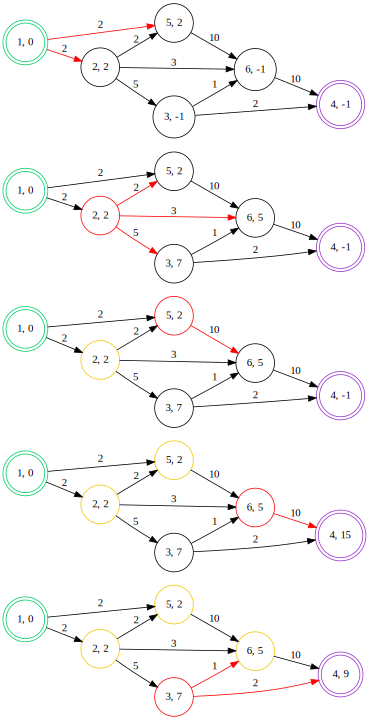

In [8]:
vis = visualize_dijkstra(g, iters_dijkstra, 0, 3)
vis

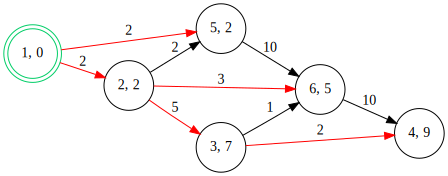

In [9]:
vis = visualize_ford_bellman(g, iters_fb, 0)
vis

## Example 2

In [10]:
g = '\
10 \
0 3 2 \
1 0 6 \
1 2 2 \
1 5 8 \
1 7 7 \
2 7 2 \
2 9 2 \
3 1 3 \
3 4 3 \
3 6 2 \
4 5 6 \
5 6 2 \
6 8 1 \
7 6 1 \
7 9 2 \
8 9 5 \
'

iters_dijkstra = '\
0 \
0 -1 -1 2 -1 -1 -1 -1 -1 -1  \
3 \
0 5 -1 2 5 -1 4 -1 -1 -1  \
'

iters_fb = '\
7 \
0 2 \
7 5 \
8 5 \
9 4 \
10 11 \
12 5 \
15 10 \
\
4 \
2 7 \
4 12 \
5 9 \
6 9 \
'

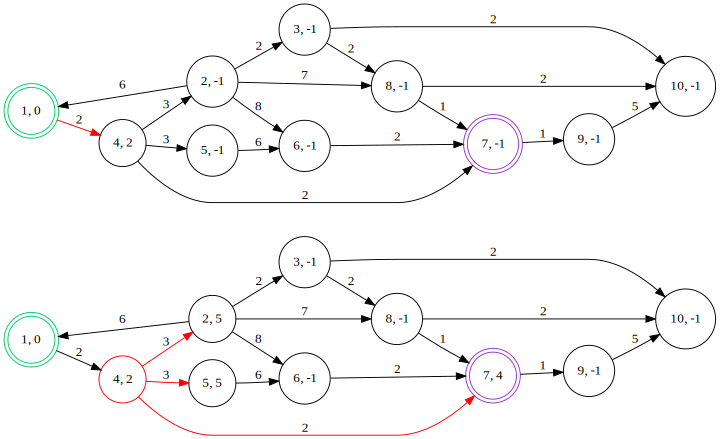

In [11]:
vis = visualize_dijkstra(g, iters_dijkstra, 0, 6)
vis

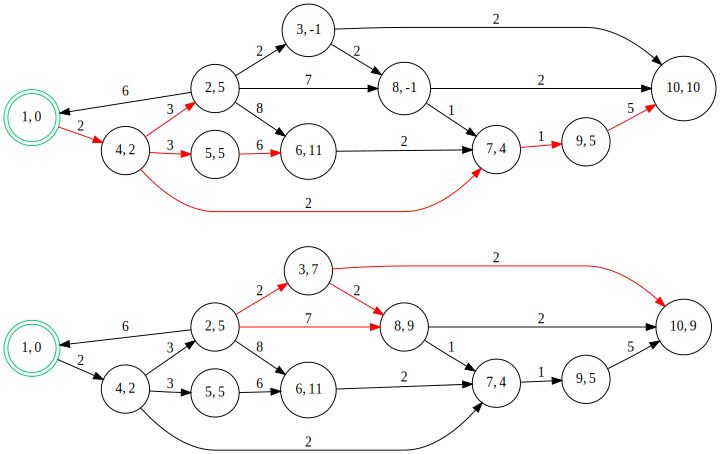

In [12]:
vis = visualize_ford_bellman(g, iters_fb, 0)
vis